In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import svm

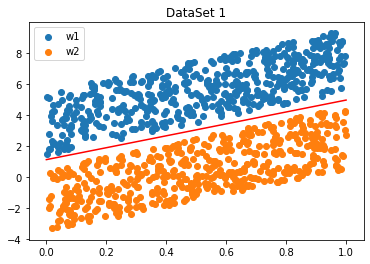

In [2]:
# 线性可分的例子
x1, y1 = [], []
x2, y2 = [], []
DataSet = []
DataLabel = []
sample = 500
delta = -0.5
for i in range(sample):
    x = random.uniform(0, 1)
    y = 4*x+1-delta+random.uniform(0, 4)
    x1.append(x)
    y1.append(y)
    DataSet.append([x, y])
    DataLabel.append(1)
for i in range(sample):
    x = random.uniform(0, 1)
    y = 4*x+1+delta-random.uniform(0, 4)
    x2.append(x)
    y2.append(y)
    DataSet.append([x, y])
    DataLabel.append(-1)
DataSet = np.array(DataSet)
DataLabel = np.array(DataLabel)
clf = svm.SVC(kernel='linear')
clf.fit(DataSet, DataLabel)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0.0, 1.0, 200)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'r')
plt.scatter(x1, y1, label='w1')
plt.scatter(x2, y2, label='w2')
plt.title(u'DataSet 1')
plt.legend()
plt.savefig('../pic/dataset1.png')
plt.show()

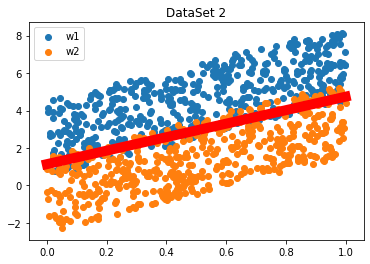

In [7]:
# 存在交叉的例子
x1, y1 = [], []
x2, y2 = [], []
DataSet = []
DataLabel = []
sample = 500
delta = 0.5
for i in range(sample):
    x = random.uniform(0, 1)
    y = 4*x+1-delta+random.uniform(0, 4)
    x1.append(x)
    y1.append(y)
    DataSet.append([x, y])
    DataLabel.append(1)
for i in range(sample):
    x = random.uniform(0, 1)
    y = 4*x+1+delta-random.uniform(0, 4)
    x2.append(x)
    y2.append(y)
    DataSet.append([x, y])
    DataLabel.append(-1)
DataSet = np.array(DataSet)
DataLabel = np.array(DataLabel)
clf = svm.SVC(kernel='linear')
clf.fit(DataSet, DataLabel)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0.0, 1.0, 200)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, linewidth=10, c='r')
plt.scatter(x1, y1, label='w1')
plt.scatter(x2, y2, label='w2')
plt.title(u'DataSet 2')
plt.legend()
plt.savefig('../pic/dataset2.png')
plt.show()

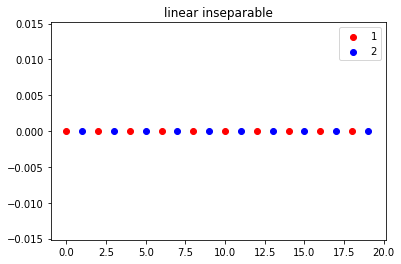

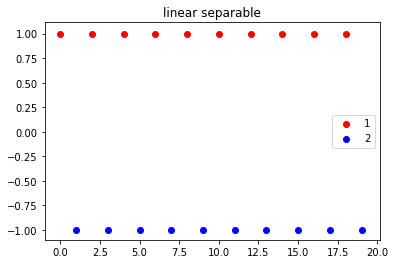

In [13]:
import numpy as np
import matplotlib.pyplot as plt
a1 = np.array(range(10))*2
a2 = np.array(a1)+1
plt.scatter(a1, np.zeros(10), c='r', label='1')
plt.scatter(a2, np.zeros(10), c='b', label='2')
plt.legend()
plt.title('linear inseparable')
plt.savefig('../pic/linear_inseparable.png')
plt.show()

y1 = np.cos(np.pi*a1)
plt.scatter(a1, y1, c='r', label='1')
y2 = np.cos(np.pi*a2)
plt.scatter(a2, y2, c='b', label='2')
plt.legend()
plt.title('linear separable')
plt.savefig('../pic/linear_separable.png')
plt.show()

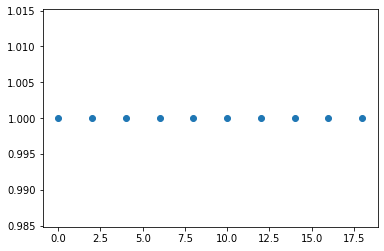

In [12]:
y1 = np.cos(np.pi*a1)
plt.scatter(a1, y1)

In [1]:
import scipy.io as io
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
def SplitData(filename = '../data/train_data.mat'):
    total_data = io.loadmat(filename)['data']
    X, y = total_data[:, :-1], total_data[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)
    return X_train, X_test, y_train, y_test

In [20]:
def RBFKernelSVM(X_train, X_test, y_train, y_test, gamma):
    svclassifier = SVC(kernel='rbf', gamma=gamma)
    svclassifier.fit(X_train, y_train)
    y_train_pred = svclassifier.predict(X_train)
    y_test_pred = svclassifier.predict(X_test)
    return np.sum(y_train_pred == y_train)/y_train_pred.shape[0], np.sum(y_test_pred == y_test)/y_test_pred.shape[0]

In [25]:
def LinearKernelSVM(X_train, X_test, y_train, y_test):
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_train_pred = svclassifier.predict(X_train)
    y_test_pred = svclassifier.predict(X_test)
    return np.sum(y_train_pred == y_train)/y_train_pred.shape[0], np.sum(y_test_pred == y_test)/y_test_pred.shape[0]

In [3]:
def PolyKernelSVM(X_train, X_test, y_train, y_test, degree):
    svclassifier = SVC(kernel='poly', degree=degree)
    svclassifier.fit(X_train, y_train)
    y_train_pred = svclassifier.predict(X_train)
    y_test_pred = svclassifier.predict(X_test)
    return np.sum(y_train_pred == y_train)/y_train_pred.shape[0], np.sum(y_test_pred == y_test)/y_test_pred.shape[0]

In [4]:
X_train, X_test, y_train, y_test = SplitData()


In [27]:
for gamma in [0.01, 0.1, 1, 10, 20]:
    print('gamma value: ', gamma)
    KerSvmTrainCorr, KerSvmTestCorr = RBFKernelSVM(X_train, X_test, y_train, y_test, gamma)
    print('accu of kernel svm method for train data is : ', KerSvmTrainCorr)
    print('accu of kernel svm method for test data is : ', KerSvmTestCorr)

gamma value:  0.01
accu of kernel svm method for train data is :  1.0
accu of kernel svm method for test data is :  0.86
gamma value:  0.1
accu of kernel svm method for train data is :  1.0
accu of kernel svm method for test data is :  0.86
gamma value:  1
accu of kernel svm method for train data is :  1.0
accu of kernel svm method for test data is :  0.86
gamma value:  10
accu of kernel svm method for train data is :  1.0
accu of kernel svm method for test data is :  0.86
gamma value:  20
accu of kernel svm method for train data is :  1.0
accu of kernel svm method for test data is :  0.86


In [26]:
# linear svm
KerSvmTrainCorr, KerSvmTestCorr = LinearKernelSVM(X_train, X_test, y_train, y_test)
print('accu of kernel svm method for train data is : ', KerSvmTrainCorr)
print('accu of kernel svm method for test data is : ', KerSvmTestCorr)

accu of kernel svm method for train data is :  0.4921111111111111
accu of kernel svm method for test data is :  0.462


In [5]:
for degree in [1, 2, 4, 8, 16]:
    print('degree value: ', degree)
    KerSvmTrainCorr, KerSvmTestCorr = PolyKernelSVM(X_train, X_test, y_train, y_test, degree)
    print('accu of kernel svm method for train data is : ', KerSvmTrainCorr)
    print('accu of kernel svm method for test data is : ', KerSvmTestCorr)

degree value:  1


/Users/wangyiwen/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accu of kernel svm method for train data is :  0.5104444444444445
accu of kernel svm method for test data is :  0.492
degree value:  2


/Users/wangyiwen/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accu of kernel svm method for train data is :  1.0
accu of kernel svm method for test data is :  1.0
degree value:  4


/Users/wangyiwen/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accu of kernel svm method for train data is :  1.0
accu of kernel svm method for test data is :  1.0
degree value:  8


/Users/wangyiwen/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accu of kernel svm method for train data is :  1.0
accu of kernel svm method for test data is :  0.986
degree value:  16


/Users/wangyiwen/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accu of kernel svm method for train data is :  1.0
accu of kernel svm method for test data is :  0.943
